In [ ]:
## Notebook env: brian_script_env (R kernel)
## evaluating proliferation effects of selected guides

In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Analysis

In [2]:
## note 6k cells seeded per well in this assay
## load in data
selected_guides_proliferation_assay = read.csv('/home/ssobti/projects/heterogeneity_brian/data/proliferation_assays/bw052024.txt', sep='\t', header=T)
guide_names = c('RNF8A-CRISPRi', 'MIS18A-CRIPSRi', 'RUVBL1-CRISPRi', 'VRK1-CRISPRi', 'HMGA1-CRISPRi', 'RNF8A-CRISPRa', 'MIS18A-CRISPRa', 'NT', 'NTCA')
guide_names = c(paste0(guide_names, '_mean'), paste0(guide_names, '_stderror'))
colnames(selected_guides_proliferation_assay) = c('Time Stamp', 'Elapsed hours', guide_names)
selected_guides_proliferation_assay = selected_guides_proliferation_assay[colnames(selected_guides_proliferation_assay) != 'Time Stamp']
head(selected_guides_proliferation_assay)

,Elapsed hours,RNF8A-CRISPRi_mean,MIS18A-CRIPSRi_mean,RUVBL1-CRISPRi_mean,VRK1-CRISPRi_mean,HMGA1-CRISPRi_mean,RNF8A-CRISPRa_mean,MIS18A-CRISPRa_mean,NT_mean,NTCA_mean,RNF8A-CRISPRi_stderror,MIS18A-CRIPSRi_stderror,RUVBL1-CRISPRi_stderror,VRK1-CRISPRi_stderror,HMGA1-CRISPRi_stderror,RNF8A-CRISPRa_stderror,MIS18A-CRISPRa_stderror,NT_stderror,NTCA_stderror
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,6.016636,8.052077,10.65912,13.84767,10.07474,7.324176,7.843402,13.36468,9.541405,0.2288063,0.4326031,0.6461991,0.7342190,0.4510066,0.3569025,0.4317553,0.5854858,0.4599222
2,6,6.860369,9.369484,12.53823,15.91043,11.70815,8.538677,9.351759,15.90000,11.179670,0.2751383,0.5136852,0.7468223,0.8124891,0.5083103,0.4207845,0.5133252,0.7269598,0.5202371
3,12,7.913754,11.025670,14.52379,18.39195,13.58580,9.878489,11.108030,18.78634,13.107650,0.3209719,0.5700140,0.8643790,0.8646275,0.6194807,0.4399621,0.6178789,0.8876463,0.6289871
4,18,8.991703,13.114980,17.23970,21.62921,15.39008,11.731400,12.957090,22.64604,15.269950,0.3913403,0.7378758,1.0252950,1.0329000,0.7070686,0.5565015,0.7046422,1.0652080,0.7456340
5,24,10.032650,15.442770,19.94460,24.80788,17.56866,13.491800,14.825200,26.40834,17.594030,0.4575817,0.8345433,1.1274090,1.1462370,0.8273957,0.6686335,0.8426215,1.2376320,0.9340051
6,30,11.261470,17.646220,22.66936,28.33214,19.53701,15.327290,16.918740,30.06178,20.276390,0.5221288,0.9313806,1.2856880,1.2747680,0.8267910,0.7768459,0.9349344,1.3610590,1.1531010


In [3]:
## make longer
selected_guides_proliferation_assay_mean = selected_guides_proliferation_assay %>% pivot_longer(cols = -c('Elapsed hours'), names_to = c('guide', '.value'), names_sep = '_')
head(selected_guides_proliferation_assay_mean)

Elapsed hours,guide,mean,stderror
<int>,<chr>,<dbl>,<dbl>
0,RNF8A-CRISPRi,6.016636,0.2288063
0,MIS18A-CRIPSRi,8.052077,0.4326031
0,RUVBL1-CRISPRi,10.659120,0.6461991
0,VRK1-CRISPRi,13.847670,0.7342190
0,HMGA1-CRISPRi,10.074740,0.4510066
0,RNF8A-CRISPRa,7.324176,0.3569025


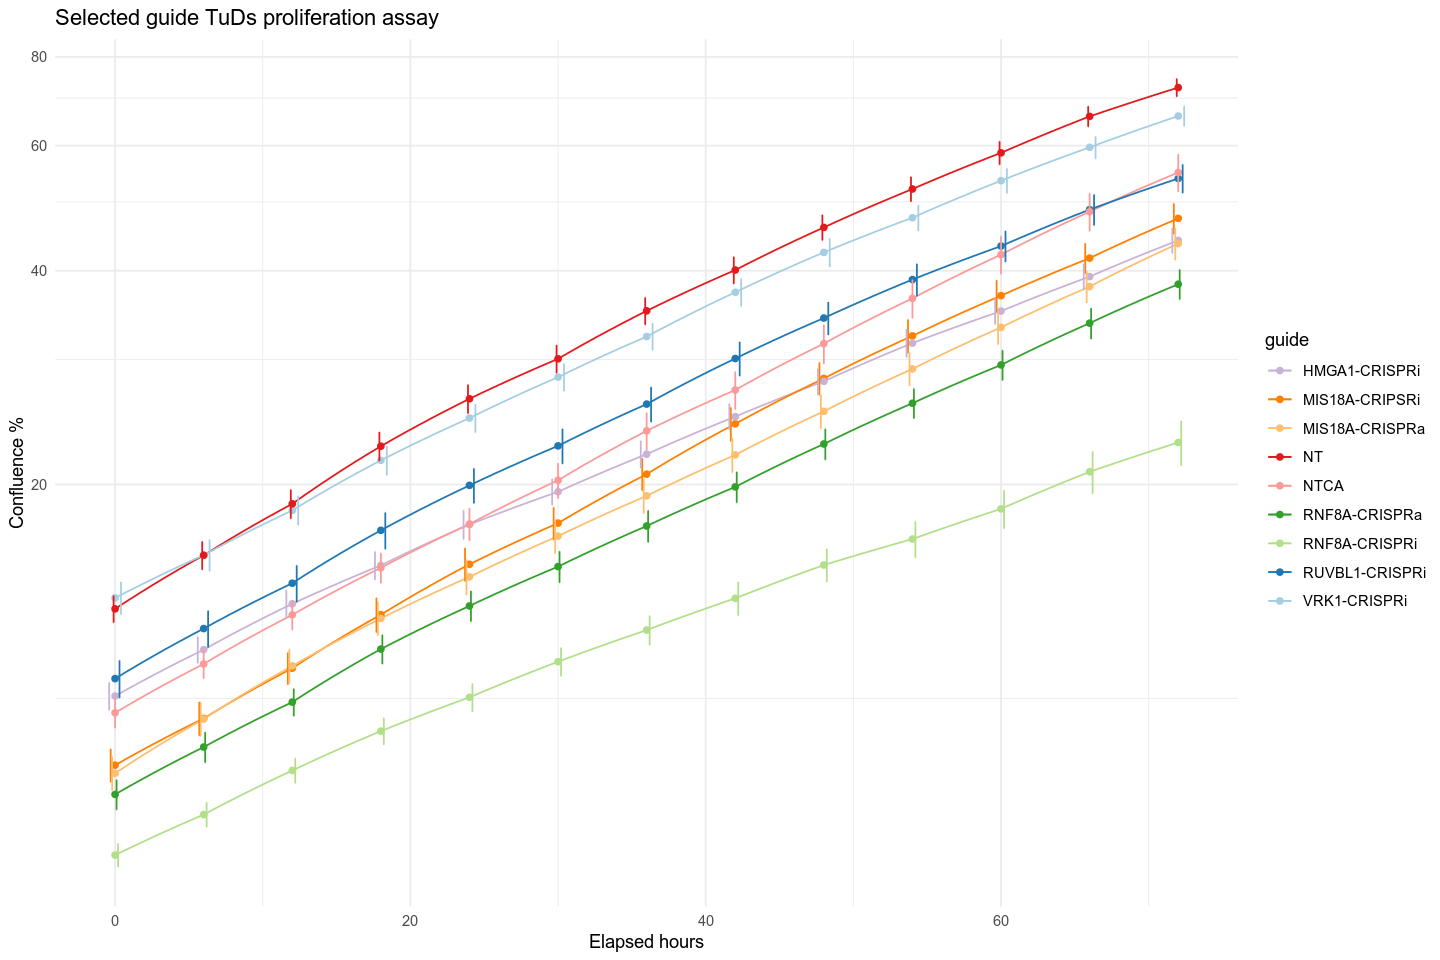

In [4]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(selected_guides_proliferation_assay_mean, aes(x = `Elapsed hours`, y = mean, color = guide)) +
geom_line() +
geom_point() + geom_errorbar(aes(ymin=mean-stderror, ymax=mean+stderror), width=.2, position=position_dodge(.9)) + 
theme_minimal() + coord_trans(y = "log2") + scale_color_brewer(palette = "Paired", direction = -1) + 
labs(title = "Selected guide TuDs proliferation assay",
      x = "Elapsed hours",
      y = "Confluence %")

In [5]:
wider_selected_guides_proliferation_assay_mean = selected_guides_proliferation_assay_mean %>% select(-stderror) %>% pivot_wider(names_from = 'guide', values_from = 'mean')
wider_selected_guides_proliferation_assay_mean = as.data.frame(wider_selected_guides_proliferation_assay_mean)
head(wider_selected_guides_proliferation_assay_mean)

,Elapsed hours,RNF8A-CRISPRi,MIS18A-CRIPSRi,RUVBL1-CRISPRi,VRK1-CRISPRi,HMGA1-CRISPRi,RNF8A-CRISPRa,MIS18A-CRISPRa,NT,NTCA
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,6.016636,8.052077,10.65912,13.84767,10.07474,7.324176,7.843402,13.36468,9.541405
2,6,6.860369,9.369484,12.53823,15.91043,11.70815,8.538677,9.351759,15.90000,11.179670
3,12,7.913754,11.025670,14.52379,18.39195,13.58580,9.878489,11.108030,18.78634,13.107650
4,18,8.991703,13.114980,17.23970,21.62921,15.39008,11.731400,12.957090,22.64604,15.269950
5,24,10.032650,15.442770,19.94460,24.80788,17.56866,13.491800,14.825200,26.40834,17.594030
6,30,11.261470,17.646220,22.66936,28.33214,19.53701,15.327290,16.918740,30.06178,20.276390


### Results

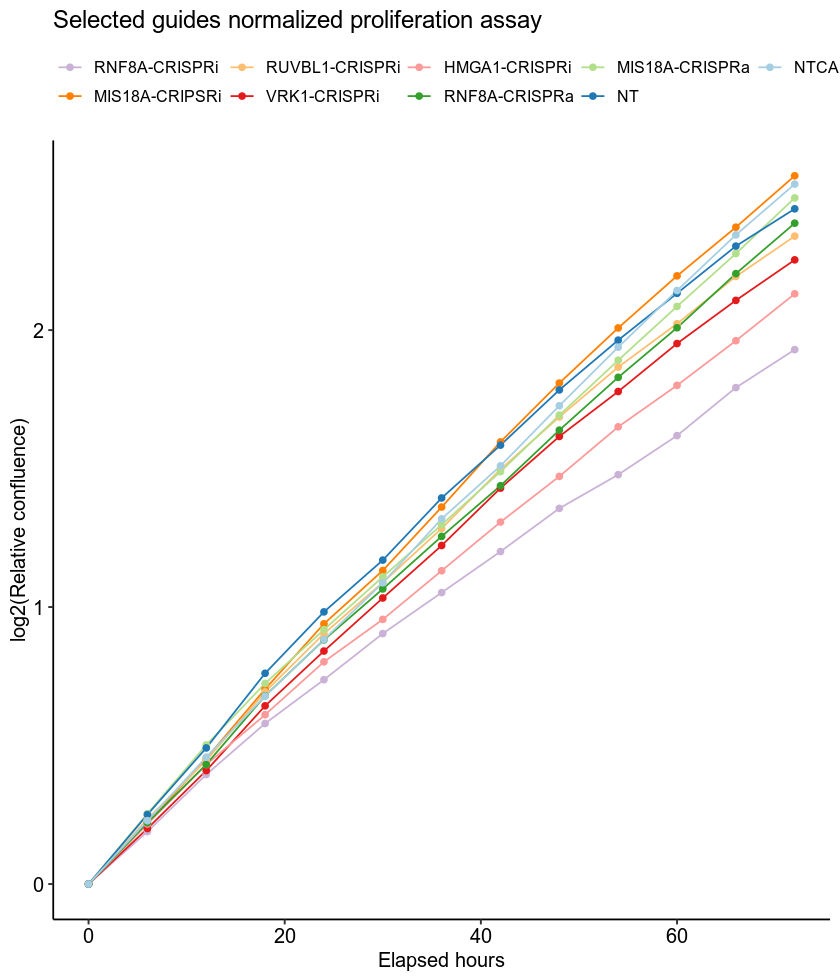

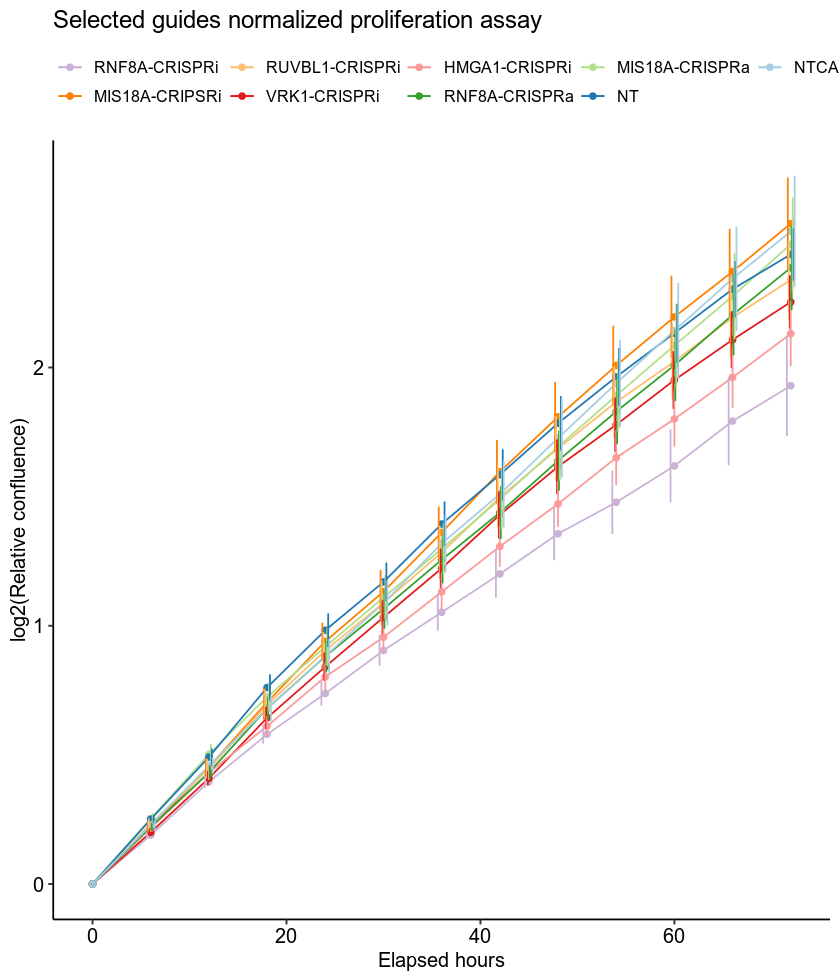

In [6]:
options(repr.plot.width=7, repr.plot.height=8.17)
## normalized starting point proliferation assay plot
## get log2 version of data
log2_wider_selected_guides_proliferation_assay_mean = cbind('Elapsed hours' = wider_selected_guides_proliferation_assay_mean$`Elapsed hours`, wider_selected_guides_proliferation_assay_mean %>% select(-`Elapsed hours`) %>% log2())
minimum = log2_wider_selected_guides_proliferation_assay_mean %>% filter(`Elapsed hours` == 0) %>% select(-`Elapsed hours`) %>% min()
diff_from_minimum =  log2_wider_selected_guides_proliferation_assay_mean %>% filter(`Elapsed hours` == 0) %>% select(-`Elapsed hours`) - minimum
diff_from_minimum = as.numeric(diff_from_minimum)
## first subract min from all points
zeroed_data = log2_wider_selected_guides_proliferation_assay_mean %>% select(-`Elapsed hours`) - minimum

## then subtract difference between min and first points from all points
normalized_log2_data = zeroed_data
for (i in 1:ncol(zeroed_data)){
    normalized_log2_data[,i] = zeroed_data[,i] - diff_from_minimum[i]
}
normalized_log2_data = cbind('Elapsed hours' = wider_selected_guides_proliferation_assay_mean$`Elapsed hours`, normalized_log2_data)

## plot
normalized_longer_log2_data = normalized_log2_data %>% pivot_longer(cols = -c('Elapsed hours'), names_to = c('guide'), values_to = 'mean') %>% as.data.frame()
normalized_longer_log2_data = cbind(normalized_longer_log2_data, stderror = normalized_longer_log2_data$mean * log2(1 + pull(selected_guides_proliferation_assay_mean, stderror)/pull(selected_guides_proliferation_assay_mean, mean)))  ## stderror must be pulled as ratio relative to the mean value
normalized_longer_log2_data$guide = factor(normalized_longer_log2_data$guide, levels = c('RNF8A-CRISPRi', 'MIS18A-CRIPSRi', 'RUVBL1-CRISPRi', 'VRK1-CRISPRi', 'HMGA1-CRISPRi', 'RNF8A-CRISPRa', 'MIS18A-CRISPRa', 'NT', 'NTCA'))

## without error bars
ggplot(normalized_longer_log2_data, aes(x = `Elapsed hours`, y = mean, color = guide)) +
geom_line() +
geom_point() +
theme_pubr() + scale_color_brewer(palette = "Paired", direction = -1) + theme(legend.title=element_blank()) +
labs(title = "Selected guides normalized proliferation assay",
      x = "Elapsed hours",
      y = "log2(Relative confluence)")

## with error bars
ggplot(normalized_longer_log2_data, aes(x = `Elapsed hours`, y = mean, color = guide)) +
geom_line() +
geom_point() + geom_errorbar(aes(ymin=mean - stderror, ymax=mean + stderror), width=.2, position=position_dodge(.9)) +
theme_pubr() + scale_color_brewer(palette = "Paired", direction = -1) + theme(legend.title=element_blank()) +
labs(title = "Selected guides normalized proliferation assay",
      x = "Elapsed hours",
      y = "log2(Relative confluence)")

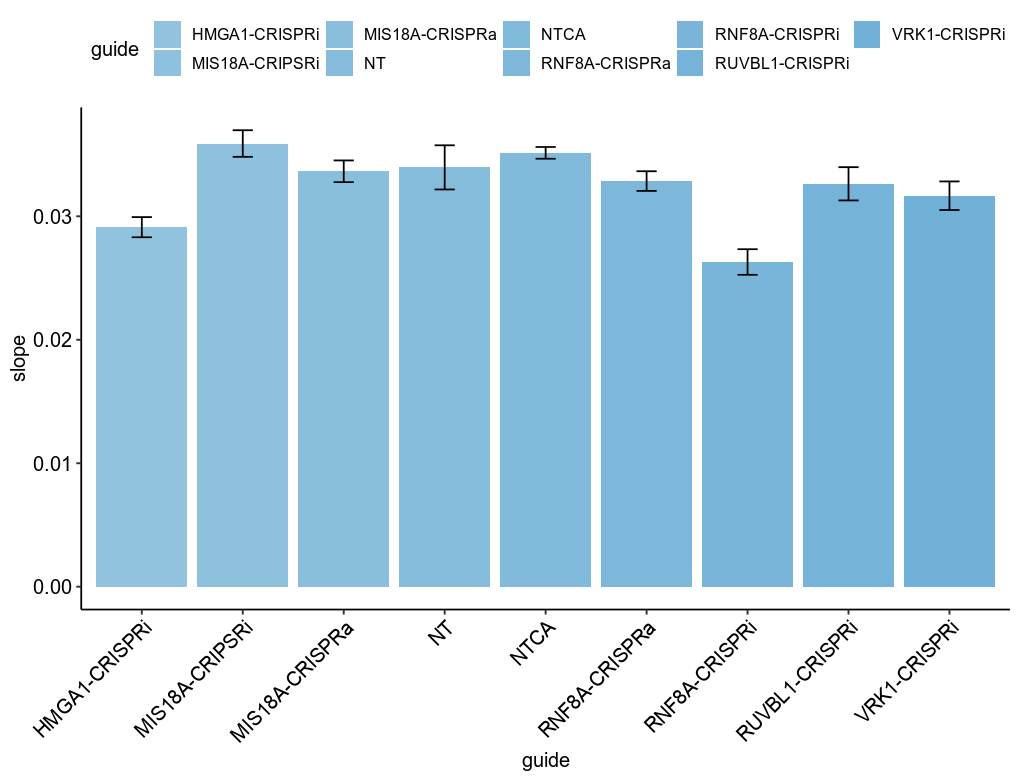

In [7]:
options(repr.plot.width=8.5, repr.plot.height=6.5)
## fitted line slopes logged
slopes = list()
upper_error = list()
lower_error = list()
n = 1
for (i in 1:length(colnames(log2_wider_selected_guides_proliferation_assay_mean))){
    if (i > 1){
        slopes[[n]] = as.numeric(coef(lm(log2_wider_selected_guides_proliferation_assay_mean[,i] ~ log2_wider_selected_guides_proliferation_assay_mean$`Elapsed hours`))[2])
        limits = abs(slopes[[n]] - as.numeric(confint(lm(log2_wider_selected_guides_proliferation_assay_mean[,i] ~ log2_wider_selected_guides_proliferation_assay_mean$`Elapsed hours`))[2,]))
        upper_error[[n]] = limits[2]
        lower_error[[n]] = limits[1]
        n = n + 1
    }
}

names(slopes) = colnames(log2_wider_selected_guides_proliferation_assay_mean)[!colnames(log2_wider_selected_guides_proliferation_assay_mean) %in% 'Elapsed hours']
slopes = unlist(slopes)
## line below needs to have errors also ordered by slope??
slopes_df = data.frame(guide = names(slopes[order(slopes)]), slope = slopes[order(slopes)], upper_error = unlist(upper_error)[order(slopes)], lower_error = unlist(lower_error)[order(slopes)])
ggplot(data = slopes_df, aes(x = guide, y = slope, fill = guide)) + 
  geom_bar(stat = "identity") + scale_fill_manual(values = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(100)[41:(40 + nrow(slopes_df))]) + geom_errorbar(aes(ymin = slope - lower_error, ymax = slope + upper_error), width=.2) + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

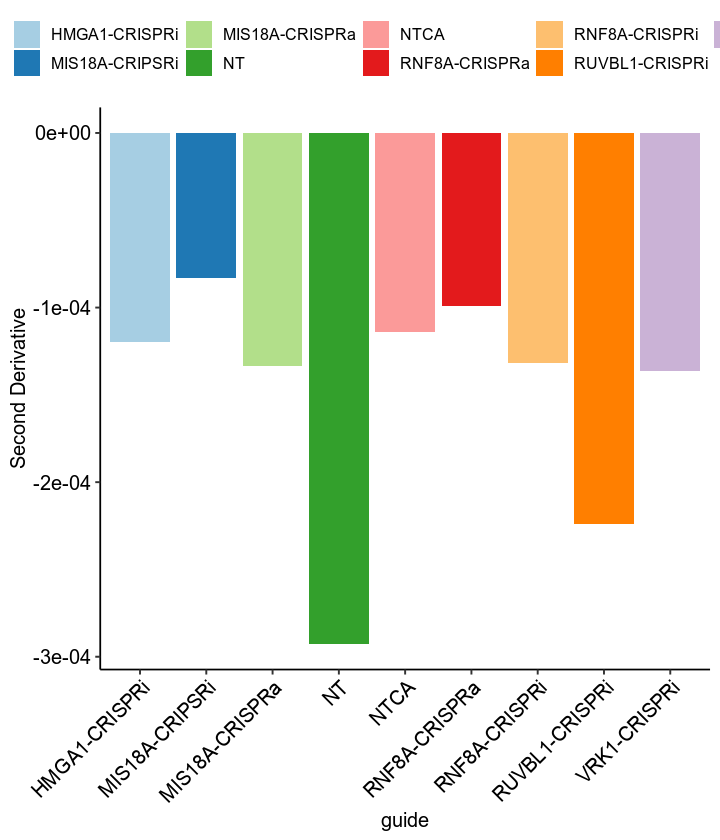

In [20]:
options(repr.plot.width=6, repr.plot.height=7)
## look at second derivative of the data
second_derivatives = data.frame(apply(log2_wider_selected_guides_proliferation_assay_mean %>% select(-"Elapsed hours"), 2, function(x) mean(diff(diff(x)/6)/6)))
colnames(second_derivatives) = 'Second Derivative'
second_derivatives$guide = rownames(second_derivatives)
ggplot(data = second_derivatives, aes(x = guide, y = `Second Derivative`, fill = guide)) +
  geom_bar(stat = "identity") + scale_fill_brewer(palette = "Paired") + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1))